<a href="https://colab.research.google.com/github/skylerchiu/The-Stock-Em-Robot/blob/main/The_Stock_'Em_Robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Uses recurrent neural networks and tensorflow to predict a future 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from pandas_datareader.data import get_quote_yahoo
import yfinance as yf
from pandas_datareader import data as pdr


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [10]:
#@title  { display-mode: "form" }
get_quote_yahoo('AAPL')

,language,region,quoteType,quoteSourceName,triggerable,currency,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,tradeable,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,firstTradeDateMilliseconds,priceHint,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,market,marketState,exchangeTimezoneShortName,gmtOffSetMilliseconds,esgPopulated,displayName,price
AAPL,en-US,US,EQUITY,Nasdaq Real Time Price,True,USD,16788100096,3.936,130.51828,-9.763283,-0.074804,123.14784,-2.392845,-0.019431,2027246977024,25.802351,30.679623,15,0,False,-1.205002,-0.98803,1615569963,120.755,120.8,119.16 - 120.8,119.16,51468973,121.96,120.29,120.3,22,9,NasdaqGS,USD,120.4,112148646,130362950,67.60249,1.271859,53.1525 - 145.09,-24.335,-0.167723,53.1525,145.09,1613001600,1611765000,1619607540,1620043200,0.807,32.75156,0.006617,3.687,4.68,4.45,27.135956,345479400000,2,NMS,Apple Inc.,Apple Inc.,finmb_24937,America/New_York,us_market,REGULAR,EST,-18000000,False,Apple,120.755


In [ ]:
#@title
get_quote_yahoo('AMC') 

,language,region,quoteType,quoteSourceName,triggerable,currency,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,firstTradeDateMilliseconds,priceHint,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingAnnualDividendYield,tradeable,marketState,displayName,price
AMC,en-US,US,EQUITY,Delayed Quote,True,USD,-41.75,-1.02,-3.26,-3.153374,287276992,-21.562,7.788529,2.49147,0.31989,4.783358,5.496642,1.149118,3485670144,-10.078431,-0.476765,15,0,NYQ,"AMC Entertainment Holdings, Inc","AMC Entertainment Holdings, Inc.",finmb_34874958,America/New_York,EST,-18000000,us_market,False,1387377000000,2,-0.680931,1615510799,10.21,-0.07,0.429999,4.365476,1615496401,10.28,10.87,9.9 - 10.87,9.9,82687040,9.85,0.0,0.0,9,40,NYSE,USD,10.65,161998564,112649542,8.37,4.382199,1.91 - 20.36,-10.080001,-0.495088,1.91,20.36,1584921600,1615410000,1623063540,1623412800,0.03,0.003046,False,PREPRE,AMC Entertainment,10.28


In [ ]:
#@title
get_quote_yahoo('LSPD.TO')

,language,region,quoteType,quoteSourceName,triggerable,currency,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,firstTradeDateMilliseconds,priceHint,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,tradeable,marketState,price
LSPD.TO,en-US,US,EQUITY,Delayed Quote,True,CAD,-1.045,-0.58,-0.87,-92.68965,118864000,11.505,88.420296,-7.780296,-0.087992,66.19657,14.443428,0.21819,9585192960,-139.03448,7.009126,15,15,TOR,LIGHTSPEED POS INC,Lightspeed POS Inc.,finmb_105664036,America/Toronto,EST,-18000000,ca_market,False,1552055400000,2,7.279999,9.923662,1615496400,80.64,81.0,74.1 - 81.0,74.1,935070,73.36,80.71,80.69,0,0,Toronto,USD,75.53,733572,1178942,70.14,6.68,10.5 - 104.98,-24.340004,-0.231854,10.5,104.98,1612421704,1621427400,1621859400,False,PREPRE,80.64


In [ ]:
#@title
get_quote_yahoo('TSLA')

,language,region,quoteType,quoteSourceName,triggerable,currency,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingPE,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,firstTradeDateMilliseconds,priceHint,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketTime,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,tradeable,marketState,displayName,price
TSLA,en-US,US,EQUITY,Nasdaq Real Time Price,True,USD,699.6,702.5,677.18 - 702.5,677.18,35586482,668.06,0.0,0.0,9,29,NasdaqGS,USD,699.4,40241361,55333614,629.498,8.979744,70.102 - 900.4,-200.80005,-0.223012,70.102,900.4,1611781200,1619521140,1620043200,1093.125,0.64,5.52,4.11,170.21896,959854016,23.151,771.2312,-71.631226,-0.092879,584.63605,114.96393,0.196642,671513837568,126.73913,30.218998,15,0,1277818200000,2,-0.157229,1615510799,698.5,-1.09998,31.539978,4.72113,1615496402,NMS,"Tesla, Inc.","Tesla, Inc.",finmb_27444752,America/New_York,EST,-18000000,us_market,False,False,PREPRE,Tesla,699.6


In [ ]:
#@title
get_quote_yahoo('NOK')

,language,region,quoteType,triggerable,currency,esgPopulated,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,marketState,postMarketChangePercent,postMarketTime,postMarketPrice,postMarketChange,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,dividendDate,trailingAnnualDividendRate,trailingAnnualDividendYield,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,tradeable,firstTradeDateMilliseconds,priceHint,displayName,price
NOK,en-US,US,EQUITY,True,USD,False,NYQ,Nokia Corporation Sponsored,Nokia Corporation,finmb_205573,America/New_York,EST,-18000000,us_market,PREPRE,-0.490247,1615510799,4.0799,-0.0201,0.14,3.53535,1615496402,4.1,4.14,4.05 - 4.14,4.05,46987210,3.96,0.0,0.0,473,473,NYSE,EUR,4.08,95174311,47105328,1.76,0.752137,2.34 - 9.79,-5.69,-0.581205,2.34,9.79,1565654400,0.221,0.055808,-0.192,0.28,0.23,17.826086,5617059840,3.119,4.27353,-0.17353,-0.040606,4.104672,-0.004672,-0.001138,23769339904,14.642857,1.314524,15,0,False,757607400000,4,Nokia,4.1


In [ ]:
#@title
get_quote_yahoo('HIVE.V')

,language,region,quoteType,quoteSourceName,triggerable,currency,firstTradeDateMilliseconds,priceHint,marketState,tradeable,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketDayHigh,regularMarketDayRange,regularMarketDayLow,regularMarketVolume,regularMarketPreviousClose,bid,ask,bidSize,askSize,fullExchangeName,financialCurrency,regularMarketOpen,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingPE,epsTrailingTwelveMonths,epsForward,sharesOutstanding,bookValue,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook,sourceInterval,exchangeDataDelayedBy,exchange,shortName,longName,messageBoardId,exchangeTimezoneName,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,price
HIVE.V,en-US,US,EQUITY,Delayed Quote,True,CAD,1505827800000,2,PREPRE,False,0.01,0.198417,1615496393,5.05,5.22,4.96 - 5.22,4.96,3062684,5.04,5.05,5.04,0,0,TSXV,USD,5.0,8333950,7381557,4.915,36.407406,0.135 - 7.25,-2.2,-0.303448,0.135,7.25,1583260200,1583260200,1583260200,58.720932,0.086,-0.01,346583008,0.155,4.081765,0.968236,0.23721,1.832591,3.217409,1.755661,1750244224,-505.00003,32.580647,15,0,VAN,HIVE BLOCKCHAIN TECHNOLOGIES LT,HIVE Blockchain Technologies Ltd.,finmb_3175641,America/Toronto,EST,-18000000,ca_market,False,5.05


In [ ]:
#Select company name
company = 'AAPL'




In [ ]:
print(company)
intraday_data = yf.download(tickers=company, #period: The number of days/month of data required. The valid frequencies are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
 period="1d",
 interval="30m") #interval: The frequency of data. The valid intervals are 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo ,
pd.set_option("max_rows", None)
intraday_data.head(18)

TSLA
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-03-11 09:30:00-05:00,694.000000,697.775696,684.000000,690.630005,690.630005,7440832
2021-03-11 10:00:00-05:00,690.630005,693.900024,677.179993,681.049988,681.049988,3854562
2021-03-11 10:30:00-05:00,680.727600,689.239990,680.359985,686.789978,686.789978,2602099
2021-03-11 11:00:00-05:00,686.750000,697.348572,686.750000,693.159973,693.159973,3396604
2021-03-11 11:30:00-05:00,693.479980,696.690002,687.429993,688.440002,688.440002,2322461
2021-03-11 12:00:00-05:00,688.648987,693.249878,685.210022,689.989990,689.989990,1710960
2021-03-11 12:30:00-05:00,690.130005,692.780029,687.682007,690.034973,690.034973,1192979
2021-03-11 13:00:00-05:00,690.200012,699.500000,688.900024,694.650024,694.650024,2395688
2021-03-11 13:30:00-05:00,694.650024,695.969971,689.580017,691.630005,691.630005,1682510


[*********************100%***********************]  1 of 1 completed


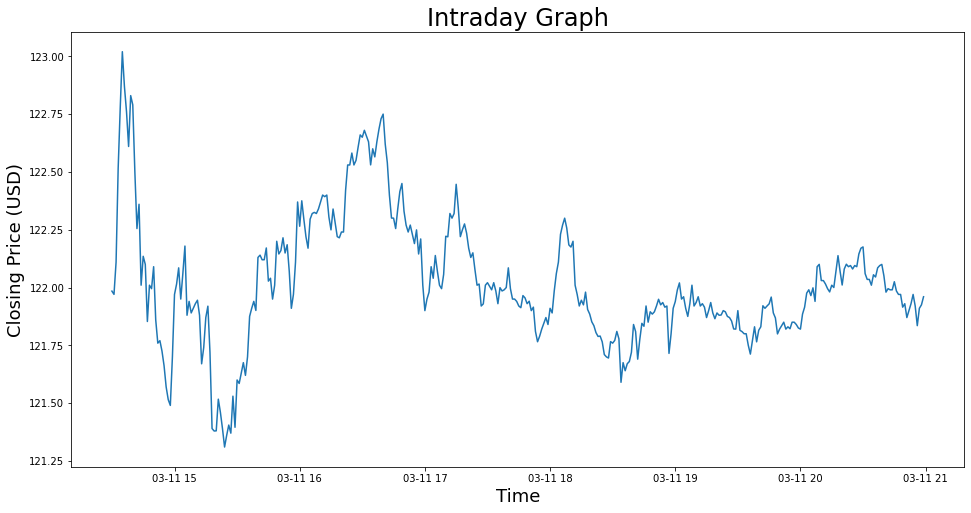

In [ ]:
intraday_data_graph = yf.download(tickers=company, #period: The number of days/month of data required. The valid frequencies are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
 period="1d",
 interval="1m", auto_adjust=True)
intraday_data_graph.shape
plt.figure(figsize = (16,8))
plt.title('Intraday Graph', fontsize = 24)
plt.plot(intraday_data_graph['Close'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Closing Price (USD)', fontsize = 18)
plt.show()

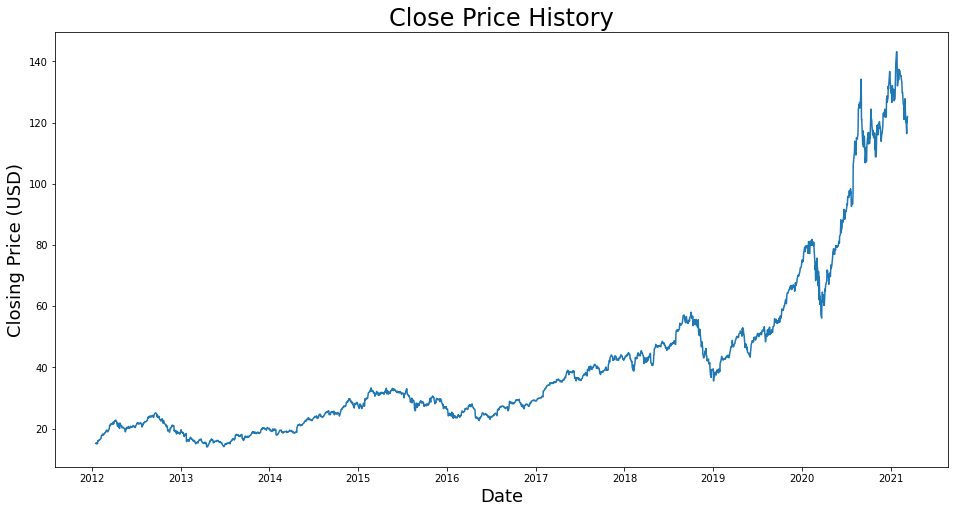

In [ ]:
#Select date to represent on graph
data = web.DataReader(company, data_source ='yahoo', start = '2012-01-17', end = '2022-01-01')

data.shape
plt.figure(figsize = (16,8))
plt.title('Close Price History', fontsize = 24)
plt.plot(data['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price (USD)', fontsize = 18)
plt.show()


In [ ]:
'''
#Candle stick graph
import plotly.graph_objects as go



df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()'''

"\n#Candle stick graph\nimport plotly.graph_objects as go\n\n\n\ndf = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')\n\nfig = go.Figure(data=[go.Candlestick(x=df['Date'],\n                open=df['AAPL.Open'],\n                high=df['AAPL.High'],\n                low=df['AAPL.Low'],\n                close=df['AAPL.Close'])])\n\nfig.show()"

In [ ]:
#Prepares and scales data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))



In [ ]:
#Builds the Model
model = Sequential() #Calls Squential method

model.add(LSTM(units = 50, return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add (Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Prediction of next closing price

model.compile (optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size = 150) #Epcohs are how many times you go through your training set. Base =25 batch size =32



Epoch 1/50
15/15 [==============================] - 7s 184ms/step - loss: 0.0130
Epoch 2/50
15/15 [==============================] - 3s 185ms/step - loss: 0.0018
Epoch 3/50
15/15 [==============================] - 3s 183ms/step - loss: 0.0011
Epoch 4/50
15/15 [==============================] - 3s 183ms/step - loss: 0.0010
Epoch 5/50
15/15 [==============================] - 3s 183ms/step - loss: 0.0011
Epoch 6/50
15/15 [==============================] - 3s 182ms/step - loss: 9.4241e-04
Epoch 7/50
15/15 [==============================] - 3s 184ms/step - loss: 8.5895e-04
Epoch 8/50
15/15 [==============================] - 3s 184ms/step - loss: 8.6756e-04
Epoch 9/50
15/15 [==============================] - 3s 184ms/step - loss: 6.4933e-04
Epoch 10/50
15/15 [==============================] - 3s 184ms/step - loss: 6.4934e-04
Epoch 11/50
15/15 [==============================] - 3s 184ms/step - loss: 6.9496e-04
Epoch 12/50
15/15 [==============================] - 3s 183ms/step - loss: 7.2878e-

In [ ]:
#Test the model accuracy on existing data
test_start = dt.datetime(2021,2,25) #For more stable stocks, choose a start date further in the past. For volitile stocks, select a start date a week or two prior
test_end = dt.datetime.now() 

test_data = web.DataReader(company,'yahoo',test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data["Close"], test_data['Close']), axis = 0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


In [ ]:
#Makes preditions on data

x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test=np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices) #reverses scaling


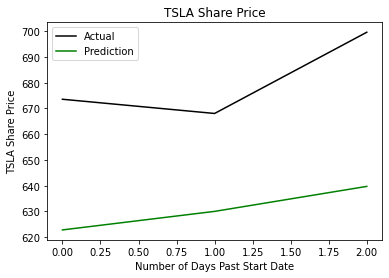

In [ ]:
plt.plot(actual_prices, color = "black", label = f"Actual")
plt.plot(predicted_prices, color = "green", label = f"Prediction")
plt.title(f"{company} Share Price")
plt.xlabel('Number of Days Past Start Date')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [ ]:
#Predicting one day into the future
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print ("The projected price for ",company, " for tomorrow is approximately:")
print(prediction)

The projected price for  TSLA  for tomorrow is approximately:
[[651.5925]]
